<IPython.core.display.Javascript object>


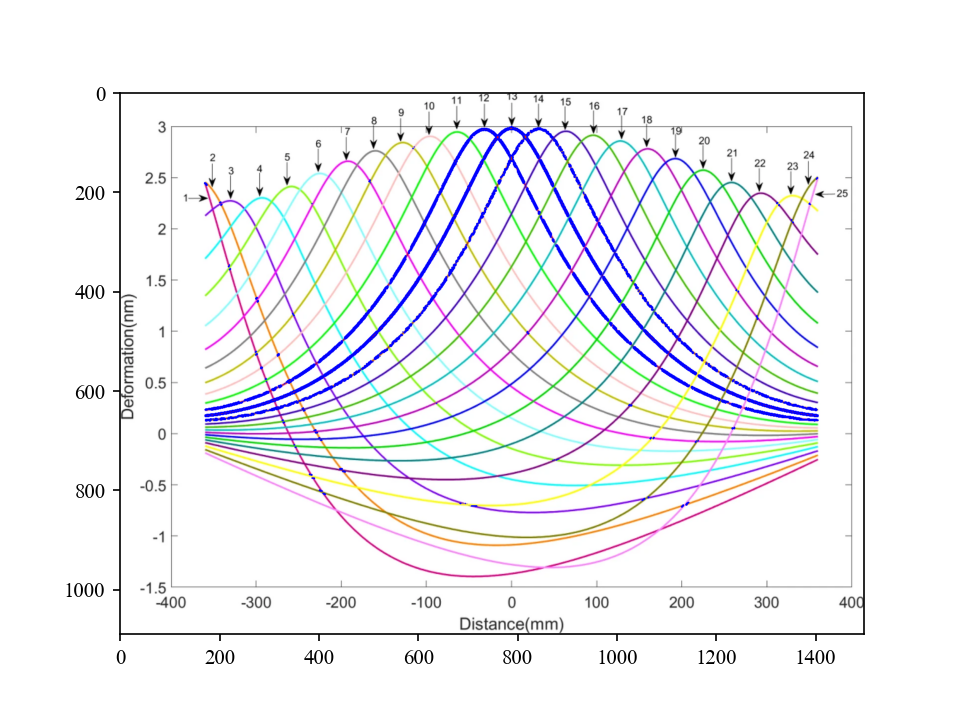

[(5.600000000000023, -0.5550000000000002), (14.399999999999977, -0.5550000000000002), (346.4, -0.5437500000000002), (346.4, -0.549375), (344.0, -0.5662500000000001), (344.79999999999995, -0.5662500000000001), (347.20000000000005, -0.549375), (347.20000000000005, -0.5437500000000002), (-4.0, -0.526875), (-12.800000000000011, -0.526875)]


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
image_path = 'data/Fig7_HTML.webp'
image = cv2.imread(image_path)

# 转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义红色的HSV范围
lower_red = np.array([0, 70, 50])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red = np.array([170, 70, 50])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)

# 合并掩码
mask = mask1 + mask2

# 应用掩码以提取红色部分
red_extracted = cv2.bitwise_and(image, image, mask=mask)

# 转换为灰度图像
gray = cv2.cvtColor(red_extracted, cv2.COLOR_BGR2GRAY)

# 检测轮廓
contours, _ = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 显示提取到的红色线条
cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

# 提取坐标并转换为数据值
# 假设我们有x和y的像素到数据的映射关系
x_pixel_min, x_pixel_max = 200, 1200
y_pixel_min, y_pixel_max = 200, 1000
x_data_min, x_data_max = -400, 400
y_data_min, y_data_max = -1.5, 3

# 定义像素到数据值的映射函数
def pixel_to_data(x_pixel, y_pixel):
    x_data = x_data_min + (x_pixel - x_pixel_min) * (x_data_max - x_data_min) / (x_pixel_max - x_pixel_min)
    y_data = y_data_max - (y_pixel - y_pixel_min) * (y_data_max - y_data_min) / (y_pixel_max - y_pixel_min)
    return x_data, y_data

# 提取红色线条的坐标
red_line_coordinates = []
for contour in contours:
    for point in contour:
        x_pixel, y_pixel = point[0]
        x_data, y_data = pixel_to_data(x_pixel, y_pixel)
        red_line_coordinates.append((x_data, y_data))

# 输出前几个坐标点作为示例
print(red_line_coordinates[:10])


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
%matplotlib notebook
import os
import time
import random
from matplotlib.font_manager import FontProperties
import math
import matplotlib
import matplotlib.patches as mpatches
from collections import Counter
matplotlib.rcParams['mathtext.fontset']='stix'
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rc('font', family="Times New Roman")
from matplotlib import font_manager
times_new_roman = font_manager.FontProperties(fname="C:\Windows\Fonts\\times.ttf")
simsun = font_manager.FontProperties(fname="C:\Windows\Fonts\\simsun.ttc")

In [ ]:
Data20240701

In [4]:
f1='Data20240701.txt'
data = np.loadtxt("%s"%f1)
datax = np.array(data[:,0])
heat_face = np.array(data[:,1:]*1e6)

f1='init_face.txt'
data = np.loadtxt("%s"%f1)
datax = np.array(data[:,0])
init_face = np.array(data[:,1:].T)[0]

<IPython.core.display.Javascript object>


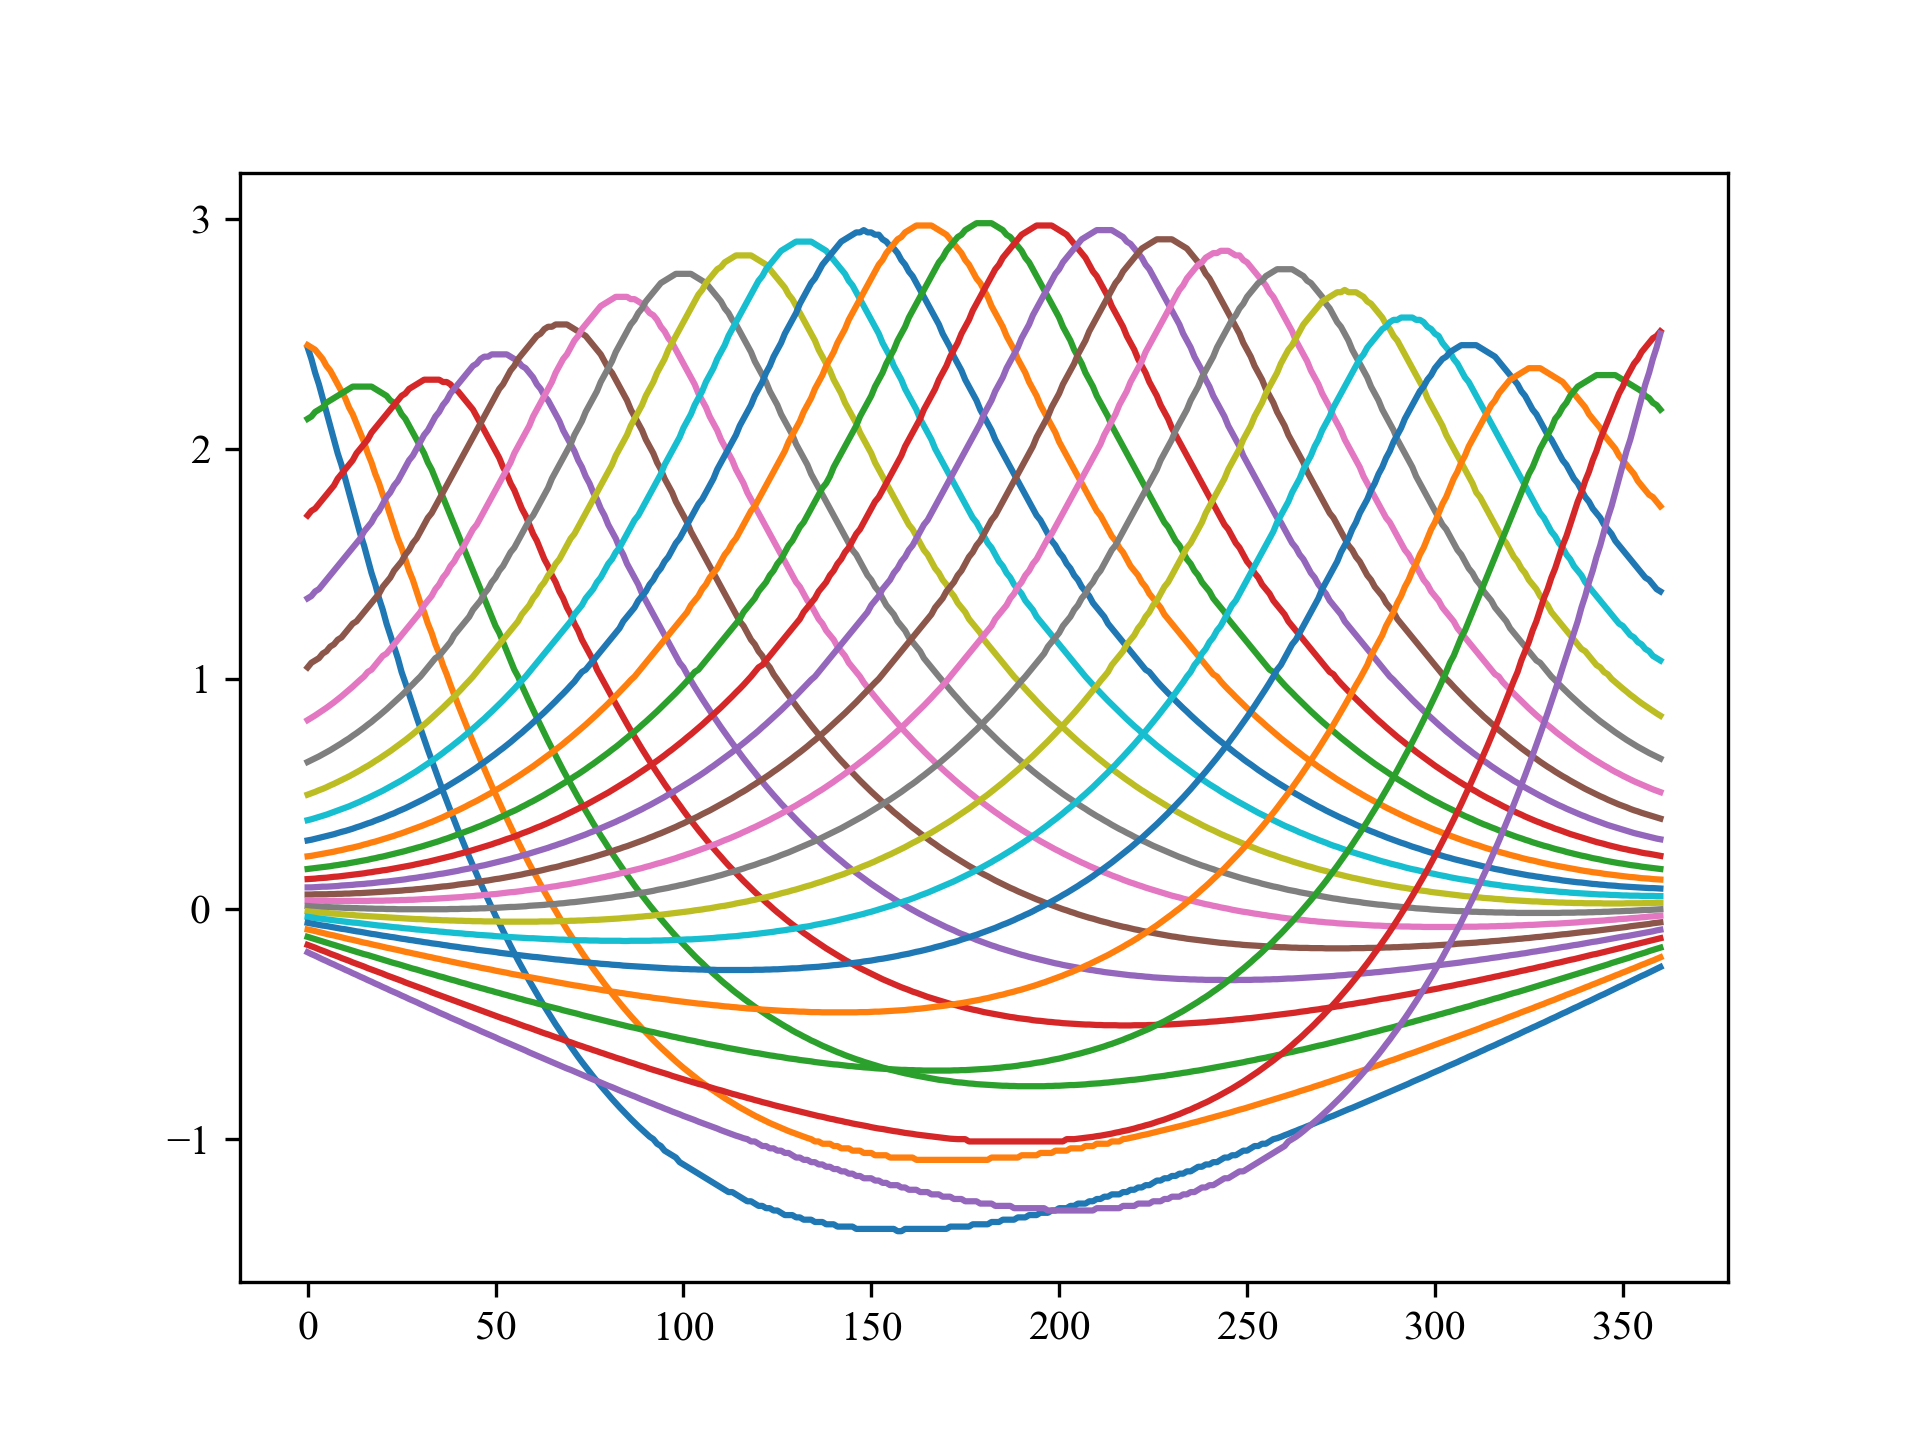

In [5]:
plt.figure(dpi = 200)
for i in range(np.size(heat_face[0,:])):
    plt.plot(heat_face[:,i])

In [4]:
import numpy as np
from scipy.optimize import lsq_linear
from scipy.optimize import nnls

# 生成目标面形修正
# 定义高斯函数
def gaussian(x, mu, sigma, a):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# 设置参数
mu = 0  # 均值
sigma = 100  # 标准差
a = 2  # 幅度

#K = gaussian(datax, mu, sigma, a)+0.1
#K = (np.sin(datax/50)+np.sin(datax/100)+np.cos(datax/25)+np.cos(datax/60))*20
#K = np.cos(datax/180) + 1
K = np.max(init_face) - init_face

# 使用线性最小二乘法求解各个加热片的功率
bounds = (0, np.inf)
start_time = time.time()
result = lsq_linear(heat_face, K, bounds=bounds)
end_time = time.time()
elapsed_time = end_time - start_time
#P, rnorm = nnls(data, K)

# 输出各个加热片的功率
P = result.x
print(f"Elapsed time: {elapsed_time} seconds")
print('Optimal Heating Powers:', P)

# 验证结果
T_computed = heat_face.dot(P)
# print('Computed Target Shape:', T_computed)
# print('Original Target Shape:', K)
# print('Residual:', K - T_computed)

NameError: name 'init_face' is not defined

In [5]:
# read data
elec_heater = []
for i in range(1,11):
    f1 = 'data/' + str(i) + '.txt'
    data = np.loadtxt("%s"%f1)
    elec_heater.append(data)
    
f1 = 'data/heat source.txt'
data = np.loadtxt("%s"%f1)
elec_heater.append(data)

elec_heater = np.array(elec_heater)
elec_heater = elec_heater*1e9

<IPython.core.display.Javascript object>


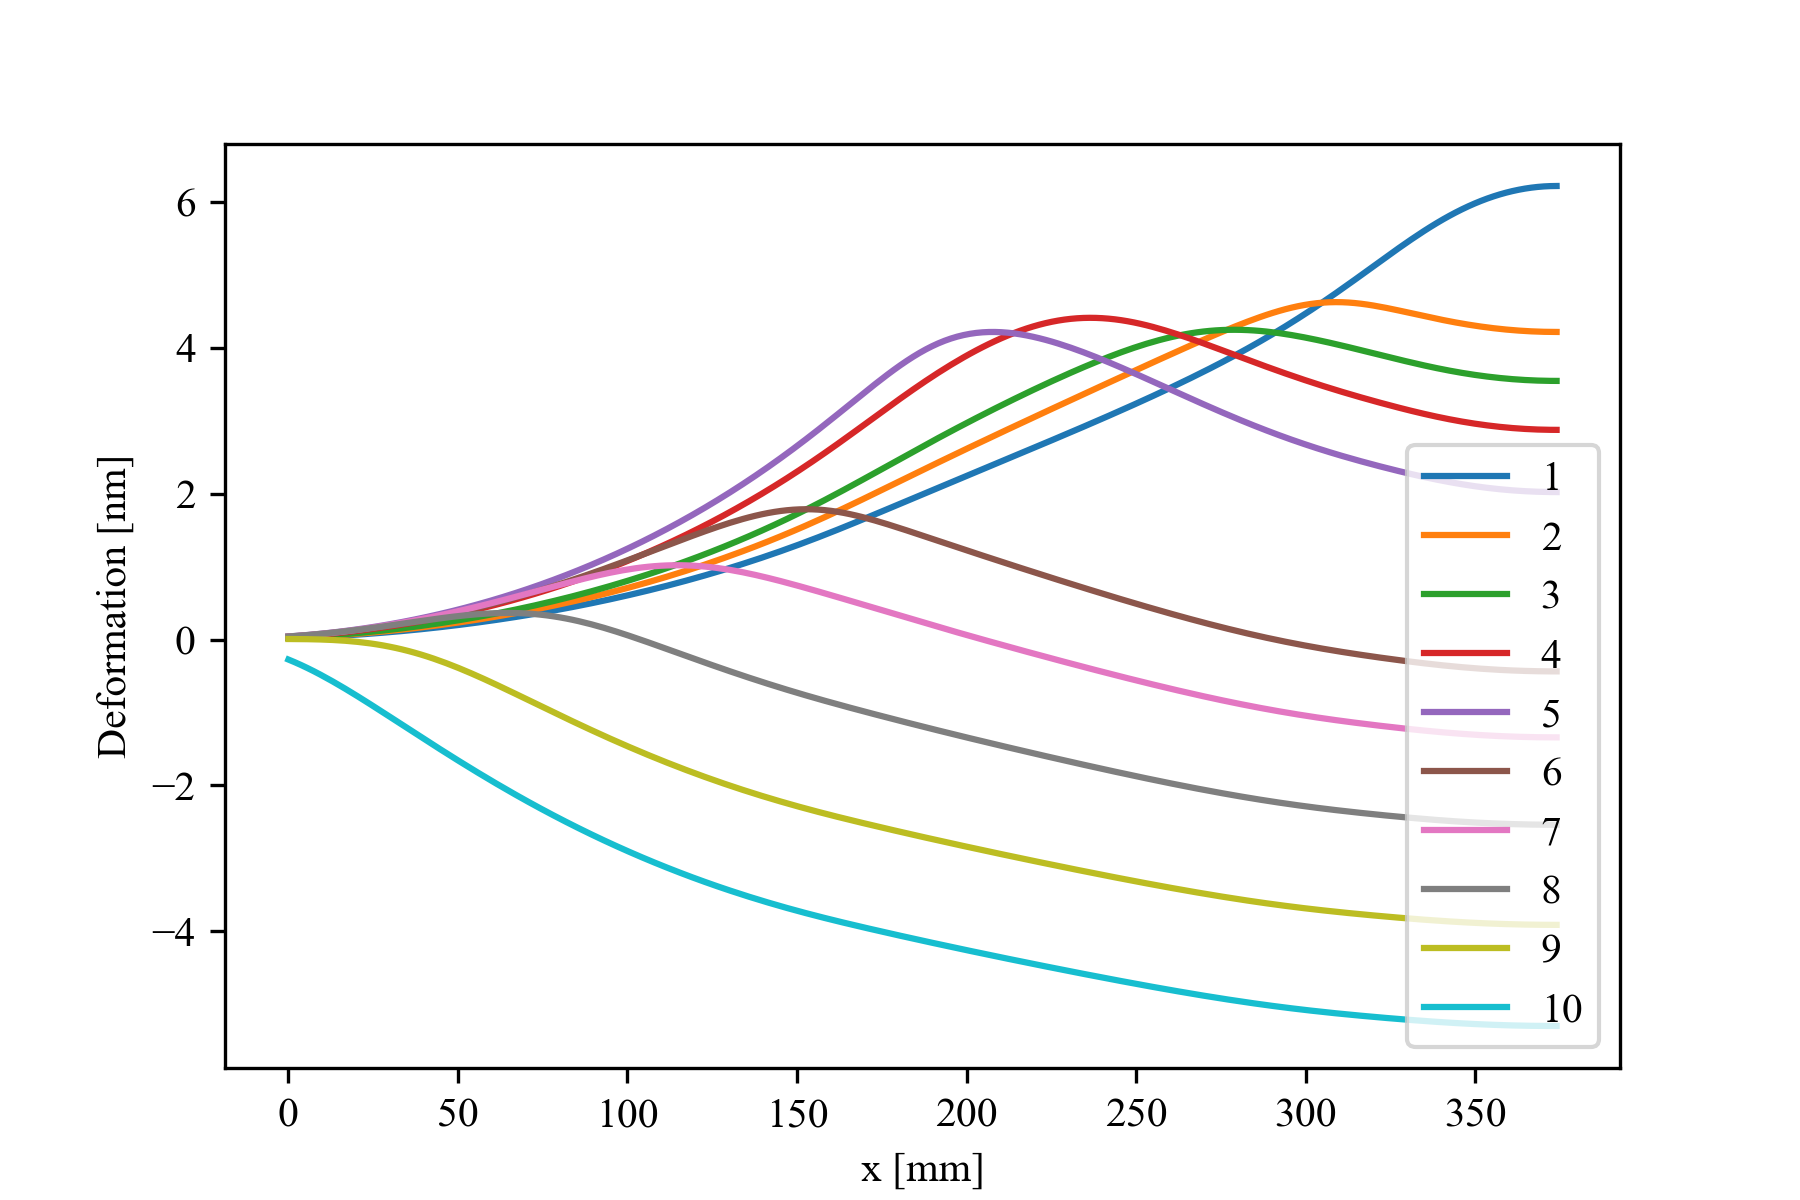

In [49]:
plt.figure(figsize=(6,4),dpi = 200)
for i in range(10):
    plt.plot(elec_heater[i,:,0]/1e6,elec_heater[i,:,1], label = str(i+1))
plt.legend()
plt.xlabel('x [mm]')
plt.ylabel('Deformation [nm]')
plt.savefig("data/heat_face.png",bbox_inches="tight")

In [145]:

    start_time = time.time()
    result = lsq_linear(heat_face, K, bounds=bounds)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time: {elapsed_time} seconds")    


Elapsed time: 0.003000497817993164 seconds


Elapsed time: 0.0009961128234863281 seconds
Optimal Heating Powers: [7.54133422e-01 3.60289573e+00 1.10852121e+01 1.01568018e-14
 6.42820362e-13 8.92464543e+00 1.26493376e+01 1.33128958e+01
 1.10133671e+01 1.06511089e+01]


<IPython.core.display.Javascript object>


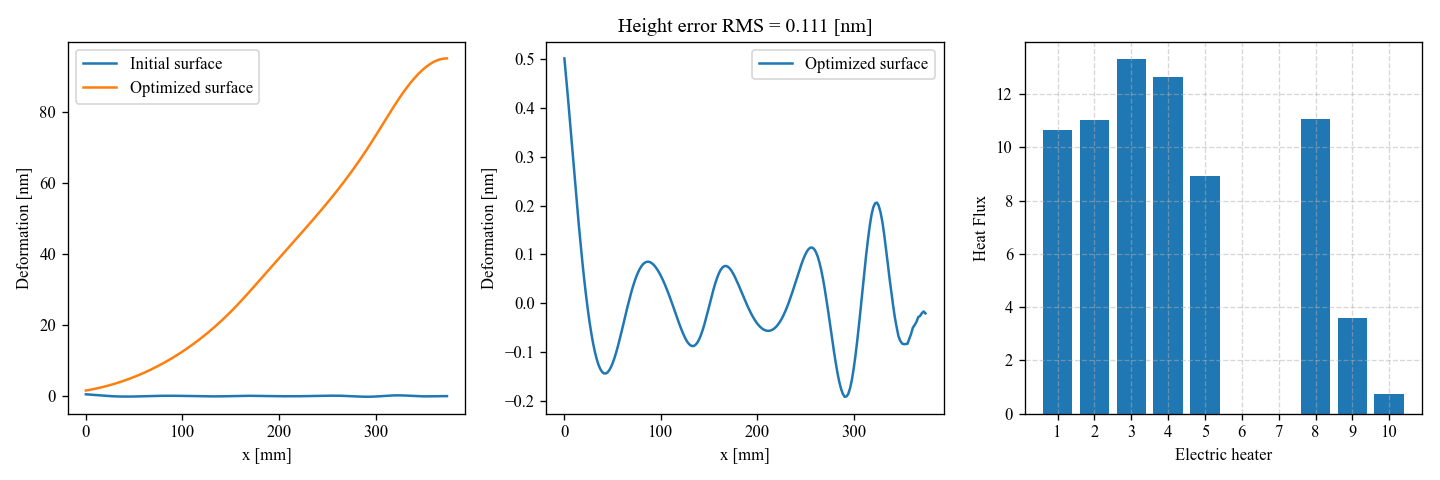

In [12]:
# read data
import numpy as np
from scipy.optimize import lsq_linear
from scipy.optimize import nnls

elec_heater = []
for i in range(1,11):
    f1 = 'data/' + str(i) + '.txt'
    data = np.loadtxt("%s"%f1)
    elec_heater.append(data)
    
f1 = 'data/heat source.txt'
data = np.loadtxt("%s"%f1)
elec_heater.append(data)

elec_heater = np.array(elec_heater)
elec_heater = elec_heater*1e9

datax = elec_heater[10,:,0]/ 1e6
init_face = elec_heater[10,:,1] * 1
heat_face = elec_heater[:10,:,1].T
K = 0 - init_face
#K = K * 0.1

# 使用线性最小二乘法求解各个加热片的功率
bounds = (0, np.inf)
start_time = time.time()
result = lsq_linear(heat_face, K, bounds=bounds)
end_time = time.time()
elapsed_time = end_time - start_time
#P, rnorm = nnls(data, K)

# 输出各个加热片的功率
P = result.x
print(f"Elapsed time: {elapsed_time} seconds")
print('Optimal Heating Powers:', P)

# 验证结果
T_computed = heat_face.dot(P)

true_values = init_face+T_computed
predicted_values = np.zeros(np.size(true_values))
rms_errors = np.sqrt(np.mean((predicted_values-true_values)**2))

# 创建一个1x3的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=80)

# 第一个图表
axs[0].plot(datax, init_face+T_computed, label='Initial surface')
axs[0].plot(datax, init_face, label='Optimized surface')
axs[0].legend()
axs[0].set_xlabel('x [mm]')
axs[0].set_ylabel('Deformation [nm]')

# 第二个图表
axs[1].plot(datax, init_face+T_computed, label='Optimized surface')
axs[1].legend()
axs[1].set_title("Height error RMS = " + str(rms_errors)[:5] + " [nm]")
axs[1].set_xlabel('x [mm]')
axs[1].set_ylabel('Deformation [nm]')

# 第三个图表
x = np.arange(1, 11)
axs[2].grid(ls="--", alpha=0.5)
axs[2].bar(x, P[::-1])
axs[2].set_xlabel('Electric heater')
axs[2].set_ylabel('Heat Flux')
axs[2].set_xticks(x)

# 调整布局
plt.tight_layout()


In [5]:
def read_data(filename):
    f1 = 'data/power_distribution_'+ filename+'.txt'
    data = np.loadtxt("%s"%f1)
    P = np.array(data)

    f1 = 'data/suface_output_'+ filename+'.txt'
    data = np.loadtxt("%s"%f1)
    datax = data[:,0] * 1e6
    init_face = data[:,1]
    T_computed = data[:,2]
    
    true_values = init_face-T_computed
    predicted_values = np.zeros(np.size(true_values))
    rms_errors = np.sqrt(np.mean((predicted_values-true_values)**2))
    
    return P, datax, init_face, T_computed, rms_errors



In [164]:
P, datax, init_face, T_computed, rms_errors = read_data("nlss")

In [167]:
P_QR, datax_QR, init_face_QR ,T_computed_QR, rms_errors_QR = read_data("QR_MGS")

In [177]:
x1

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8,  7.8,  8.8,  9.8])

<IPython.core.display.Javascript object>


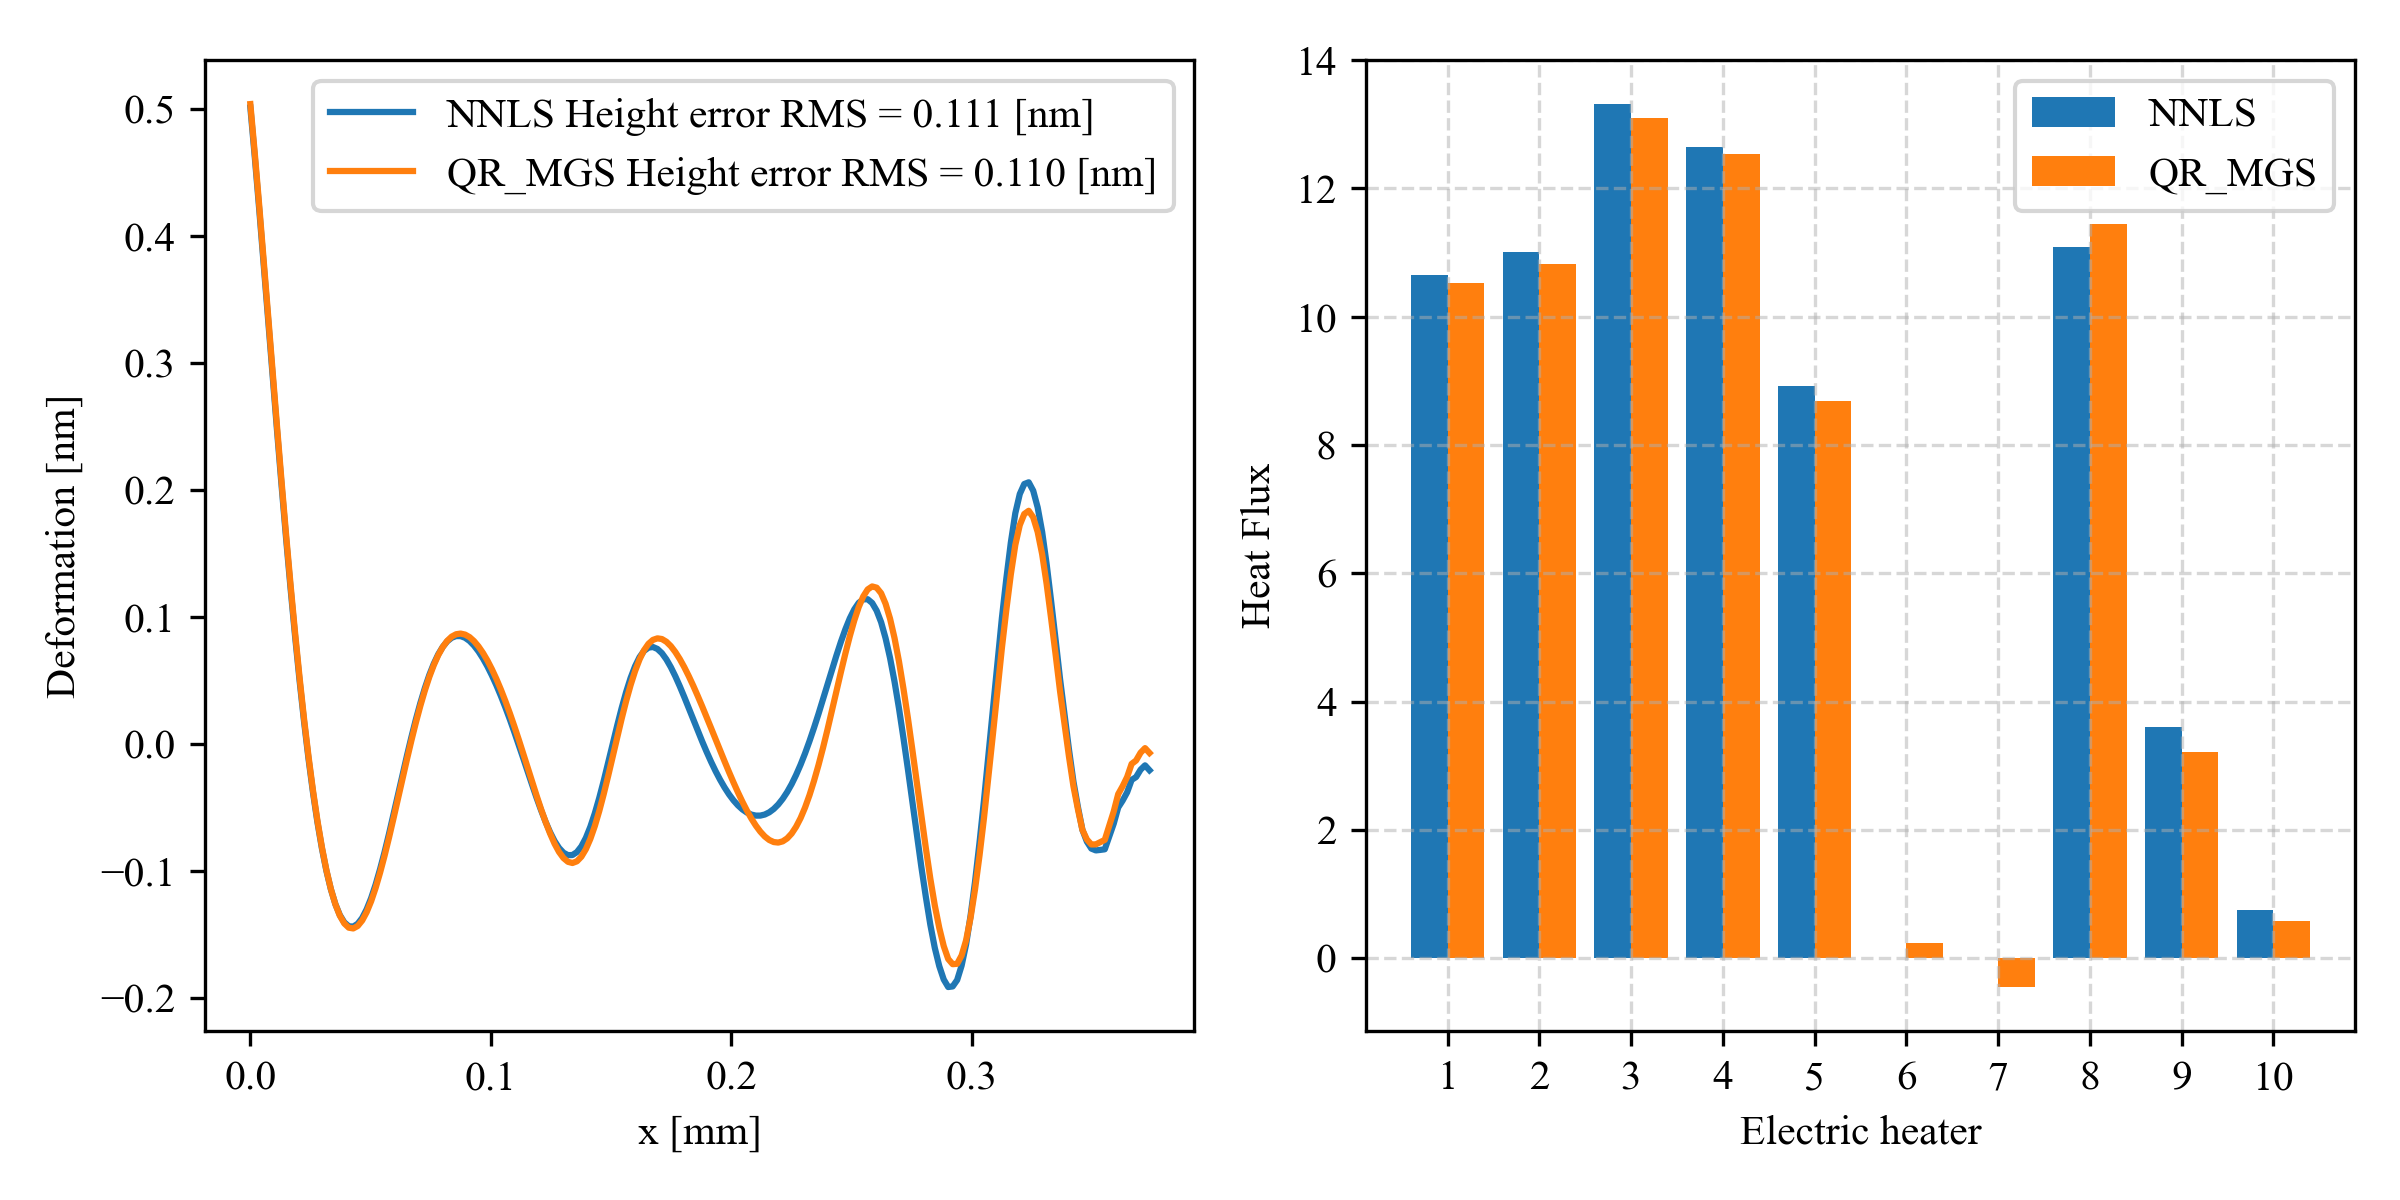

In [234]:
# 创建一个1x3的图像布局
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

# 第二个图表
axs[0].plot(datax, -init_face + T_computed, label='NNLS' + " Height error RMS = " + str(rms_errors)[:5] + " [nm]")
axs[0].plot(datax, -init_face_QR + T_computed_QR, label='QR_MGS' + " Height error RMS = " + str(rms_errors_QR)[:5] + " [nm]")
axs[0].legend()
#axs[0].set_title("Height error RMS = " + str(rms_errors_QR)[:5] + " [nm]")
axs[0].set_xlabel('x [mm]')
axs[0].set_ylabel('Deformation [nm]')

# 第三个图表
x = np.arange(1,11)   # 横坐标范围
total_width, n = 0.8, 2   # 柱状图总宽度，有几组数据
width = total_width / n   # 单个柱状图的宽度
x1 = x - width / 2   # 第一组数据柱状图横坐标起始位置
x2 = x1 + width   # 第二组数据柱状图横坐标起始位置

axs[1].grid(ls="--", alpha=0.5)
axs[1].bar(x1, P[::-1], width=width, label='NNLS')
axs[1].bar(x2, P_QR[::-1], width=width, label='QR_MGS')
axs[1].legend()
axs[1].set_xlabel('Electric heater')
axs[1].set_ylabel('Heat Flux')
axs[1].set_xticks(x)
#axs[1].set_ylim(-0.5,14)

# 调整布局
plt.tight_layout()

plt.savefig("data/nnls vs QR.png",bbox_inches="tight")

<IPython.core.display.Javascript object>


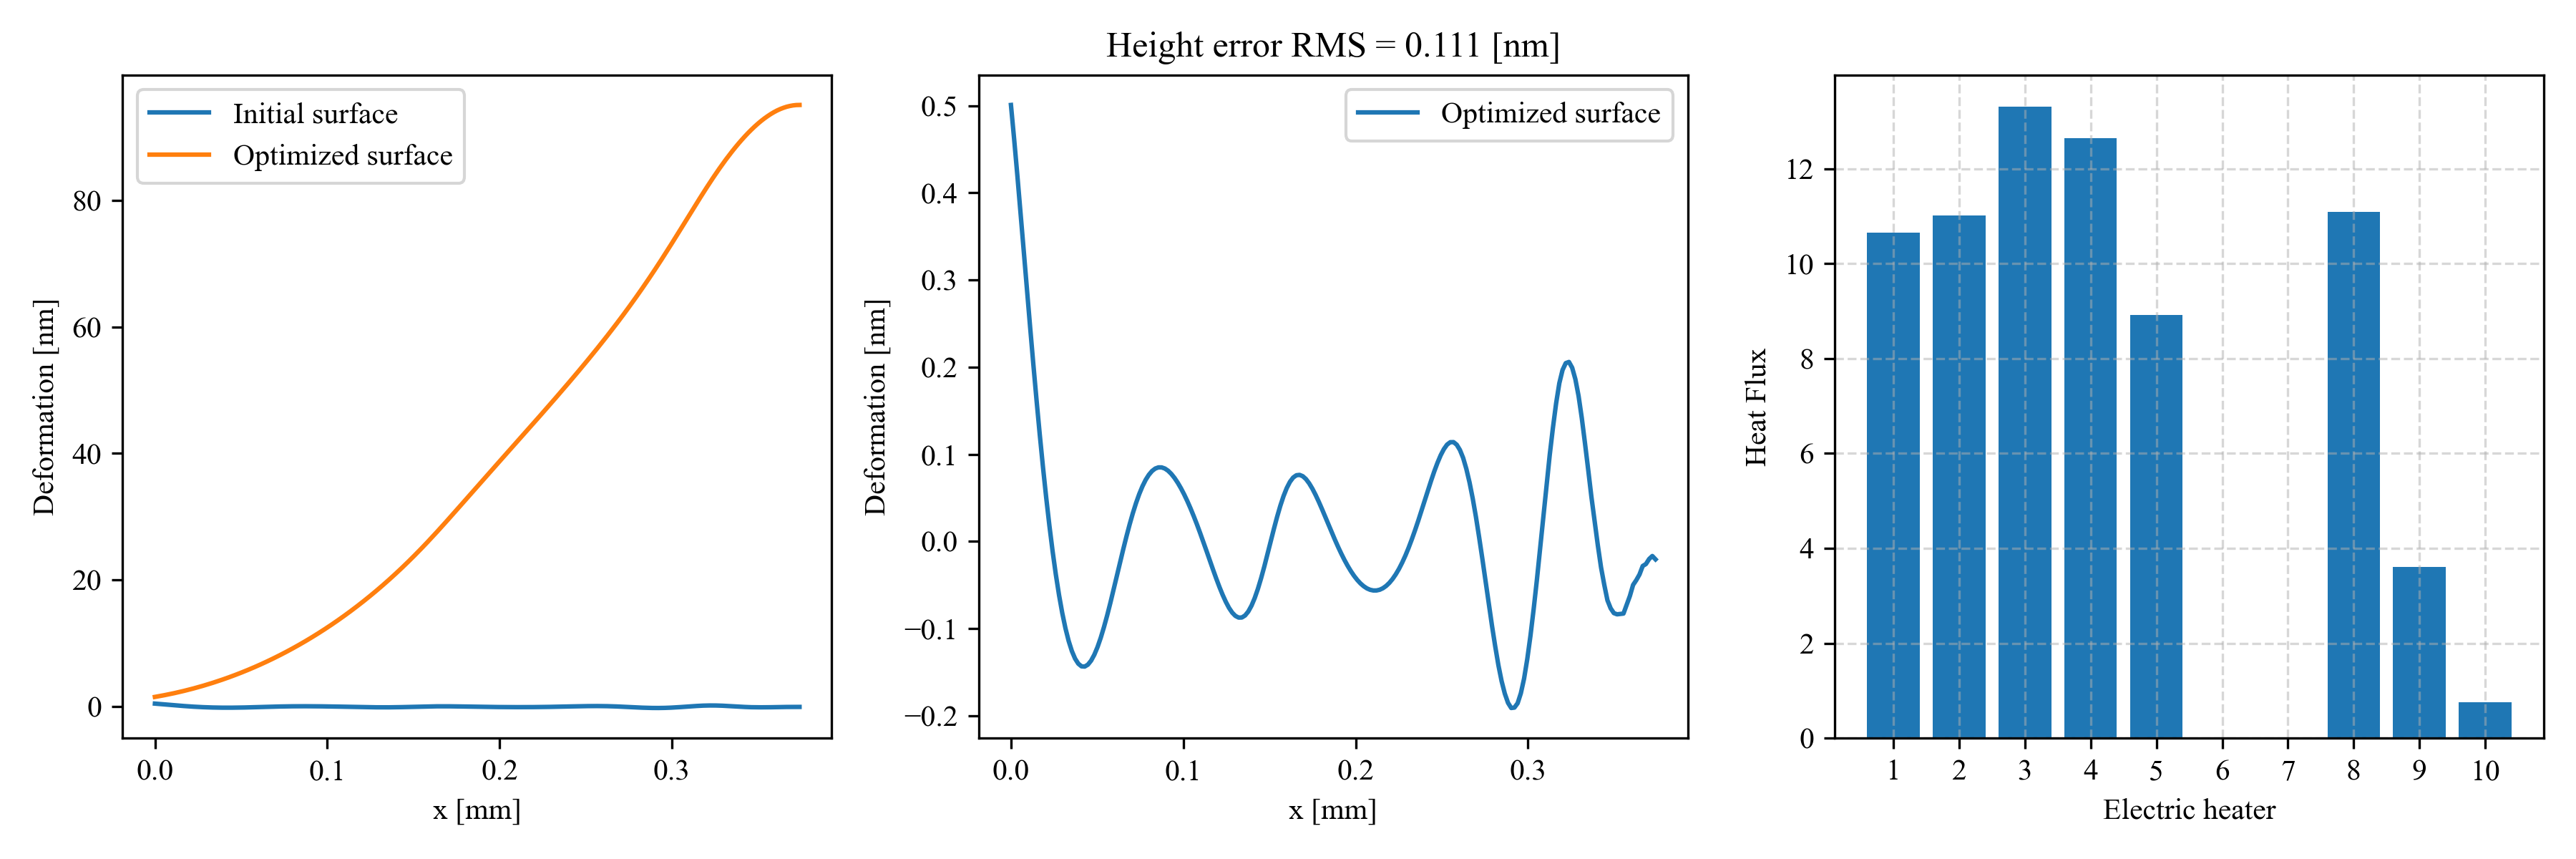

In [166]:
# 创建一个1x3的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

# 第一个图表
axs[0].plot(datax, -init_face + T_computed, label='Initial surface')
axs[0].plot(datax, -init_face, label='Optimized surface')
axs[0].legend()
axs[0].set_xlabel('x [mm]')
axs[0].set_ylabel('Deformation [nm]')

# 第二个图表
axs[1].plot(datax, -init_face + T_computed, label='Optimized surface')
axs[1].legend()
axs[1].set_title("Height error RMS = " + str(rms_errors)[:5] + " [nm]")
axs[1].set_xlabel('x [mm]')
axs[1].set_ylabel('Deformation [nm]')

# 第三个图表
x = np.arange(1, 11)
axs[2].grid(ls="--", alpha=0.5)
axs[2].bar(x, P[::-1])
axs[2].set_xlabel('Electric heater')
axs[2].set_ylabel('Heat Flux')
axs[2].set_xticks(x)

# 调整布局
plt.tight_layout()

plt.savefig("data/H.png",bbox_inches="tight")

In [11]:
init_face = np.array(elec_heater[10,:,1])
heat_face = np.array(elec_heater[:10,:,1].T)
K = 0 - init_face

In [12]:
P = heat_face @ np.linalg.inv(heat_face.T @ heat_face) @ heat_face.T @ K - K

<IPython.core.display.Javascript object>


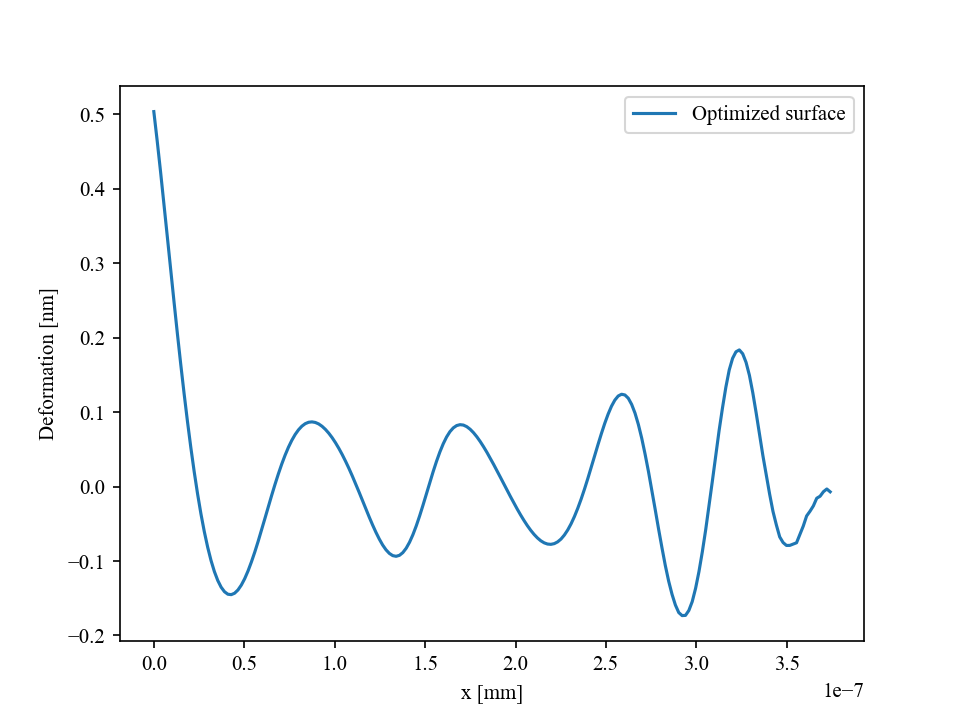

Text(0, 0.5, 'Deformation [nm]')

In [13]:
plt.figure()
plt.plot(datax,P, label = 'Optimized surface')
#plt.plot(datax,init_face, label = 'Initial surface')
#plt.plot(datax,K)
plt.legend()
plt.xlabel('x [mm]')
plt.ylabel('Deformation [nm]')

In [70]:
np.linalg.inv(heat_face.T @ heat_face) @ heat_face.T @ K

array([ 0.57755241,  3.21442539, 11.45168266, -0.44872859,  0.23341745,
        8.69147878, 12.53309511, 13.09088484, 10.82230817, 10.5191189 ])